Iteration 1, loss = 0.47574119
Iteration 2, loss = 0.23000219
Iteration 3, loss = 0.17240918
Iteration 4, loss = 0.13644130
Iteration 5, loss = 0.10947861
Iteration 6, loss = 0.08925067
Iteration 7, loss = 0.07335578
Iteration 8, loss = 0.05981970
Iteration 9, loss = 0.05002804
Iteration 10, loss = 0.04255344
Iteration 11, loss = 0.03550607
Iteration 12, loss = 0.02870704
Iteration 13, loss = 0.02352087
Iteration 14, loss = 0.02043315
Iteration 15, loss = 0.01631761
Iteration 16, loss = 0.01394087
Iteration 17, loss = 0.01150320
Iteration 18, loss = 0.00980763
Iteration 19, loss = 0.00853002
Iteration 20, loss = 0.00728279

Test Accuracy: 96.79%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


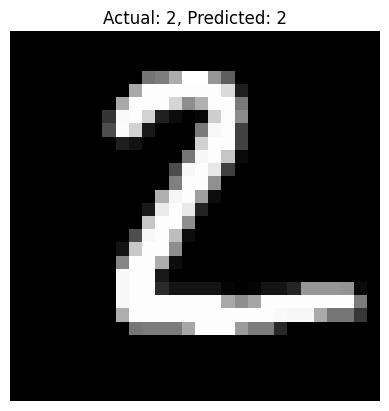

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === Load CSVs ===
train_path = '/content/sample_data/mnist_train_small.csv'
test_path = '/content/sample_data/mnist_test.csv'

train_data = np.loadtxt(train_path, delimiter=',', skiprows=1)
test_data = np.loadtxt(test_path, delimiter=',', skiprows=1)

# === Split features and labels ===
X_train = train_data[:, 1:] / 255.0
y_train = train_data[:, 0].astype(int)

X_test = test_data[:, 1:] / 255.0
y_test = test_data[:, 0].astype(int)

# === Optional: Standardize features ===
# (not required here because pixel values are already scaled to [0, 1])

# === Create and train the MLPClassifier ===
clf = MLPClassifier(hidden_layer_sizes=(128,),  # one hidden layer with 128 neurons
                    activation='relu', # MOST COMPUTATIONALY EFFICIENT
                    solver='adam',
                    max_iter=20,
                    batch_size=64,
                    verbose=True)

clf.fit(X_train, y_train)

# === Evaluate ===
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# === Visualize one prediction ===
i = 0
img = X_test[i].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
plt.axis('off')
plt.show()


5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  28.  59.  50.   0.  23.   0.   0.  32. 134. 180. 254. 206.   8.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   4.  96. 216. 233. 254. 248. 215. 231. 215. 215. 236. 254. 250. 181.  27.   0.   0.   0.   0.  

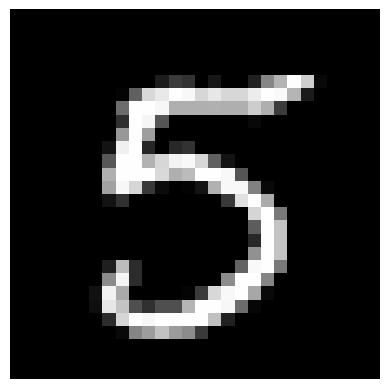

In [2]:
import numpy as np

# Show full arrays without wrapping
np.set_printoptions(linewidth=200)  # You can increase this number as needed

print(train_data[0][0])
print(train_data[0][1:].reshape(28, 28))
img = train_data[0][1:].reshape(28, 28)
plt.imshow(img, cmap='gray')

plt.axis('off')
plt.show()

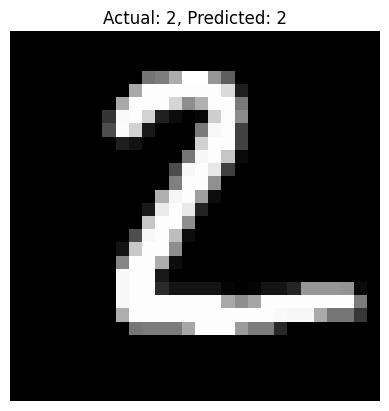

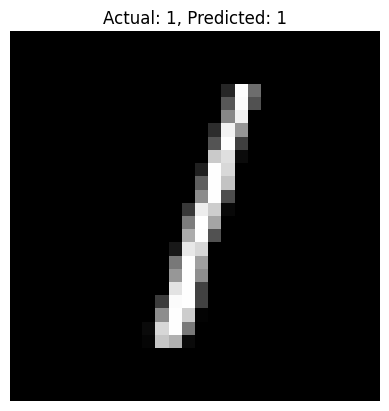

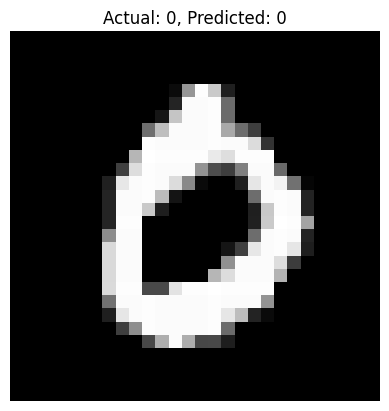

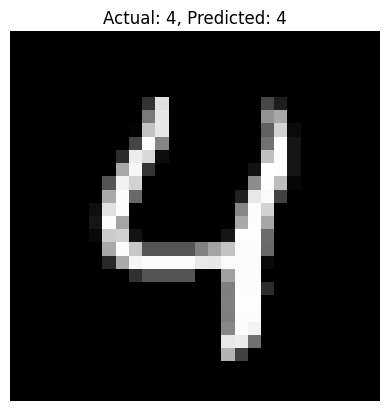

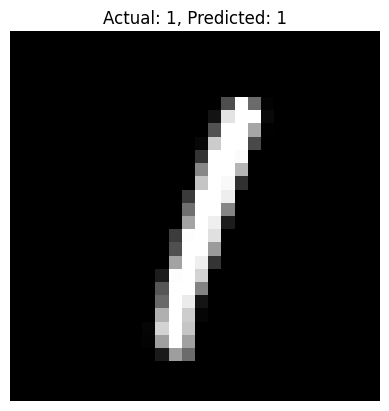

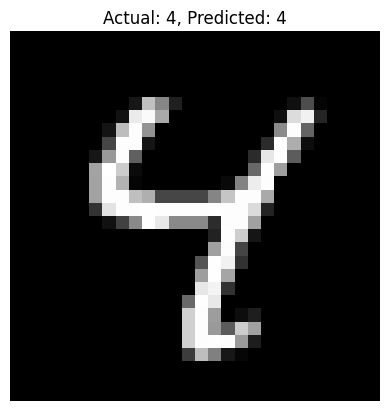

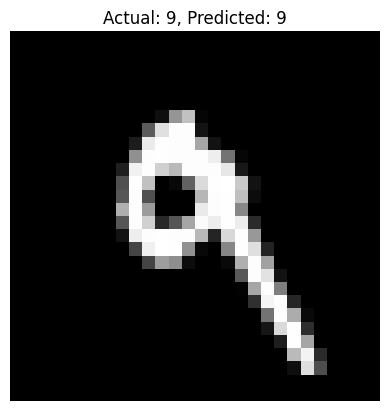

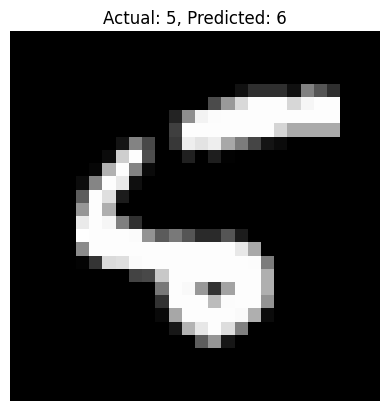

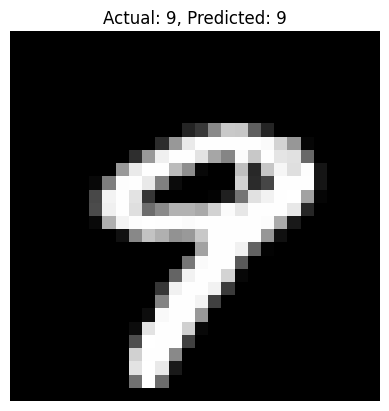

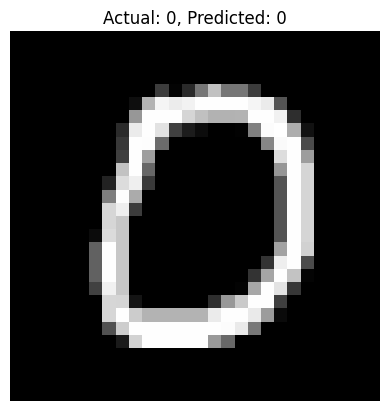

In [4]:
import matplotlib.pyplot as plt

# Show n images from test set
def display_predictions(X, y_true, y_pred, count=10):
    for i in range(count):
        img = X[i].reshape(28, 28)
        true_label = y_true[i]
        pred_label = y_pred[i]

        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {true_label}, Predicted: {pred_label}")
        plt.axis('off')
        plt.show()

# Predict and display
# The original code used 'preds' which was not defined.
# Changed 'preds' to 'y_pred' to use the predictions from the classifier.
display_predictions(X_test, y_test, y_pred, count=10)

In [5]:
# Print the shape of the data
print("Shape of train_data:", train_data.shape)

# Print the first 3 rows
print("\nFirst 3 rows of raw data (label + 784 pixels):")
for i in range(3):
    print(f"Row {i+1}: Label = {int(train_data[i, 0])}, Pixels (first 10) = {train_data[i, 1:11]}")


Shape of train_data: (19999, 785)

First 3 rows of raw data (label + 784 pixels):
Row 1: Label = 5, Pixels (first 10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Row 2: Label = 7, Pixels (first 10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Row 3: Label = 9, Pixels (first 10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
